In [71]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [72]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [74]:
# Read the column description and ensure you understand each attribute well
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [76]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [77]:
# Check whether any column has null values
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [78]:
# View and understand the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [79]:
# Finding the unique data
data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

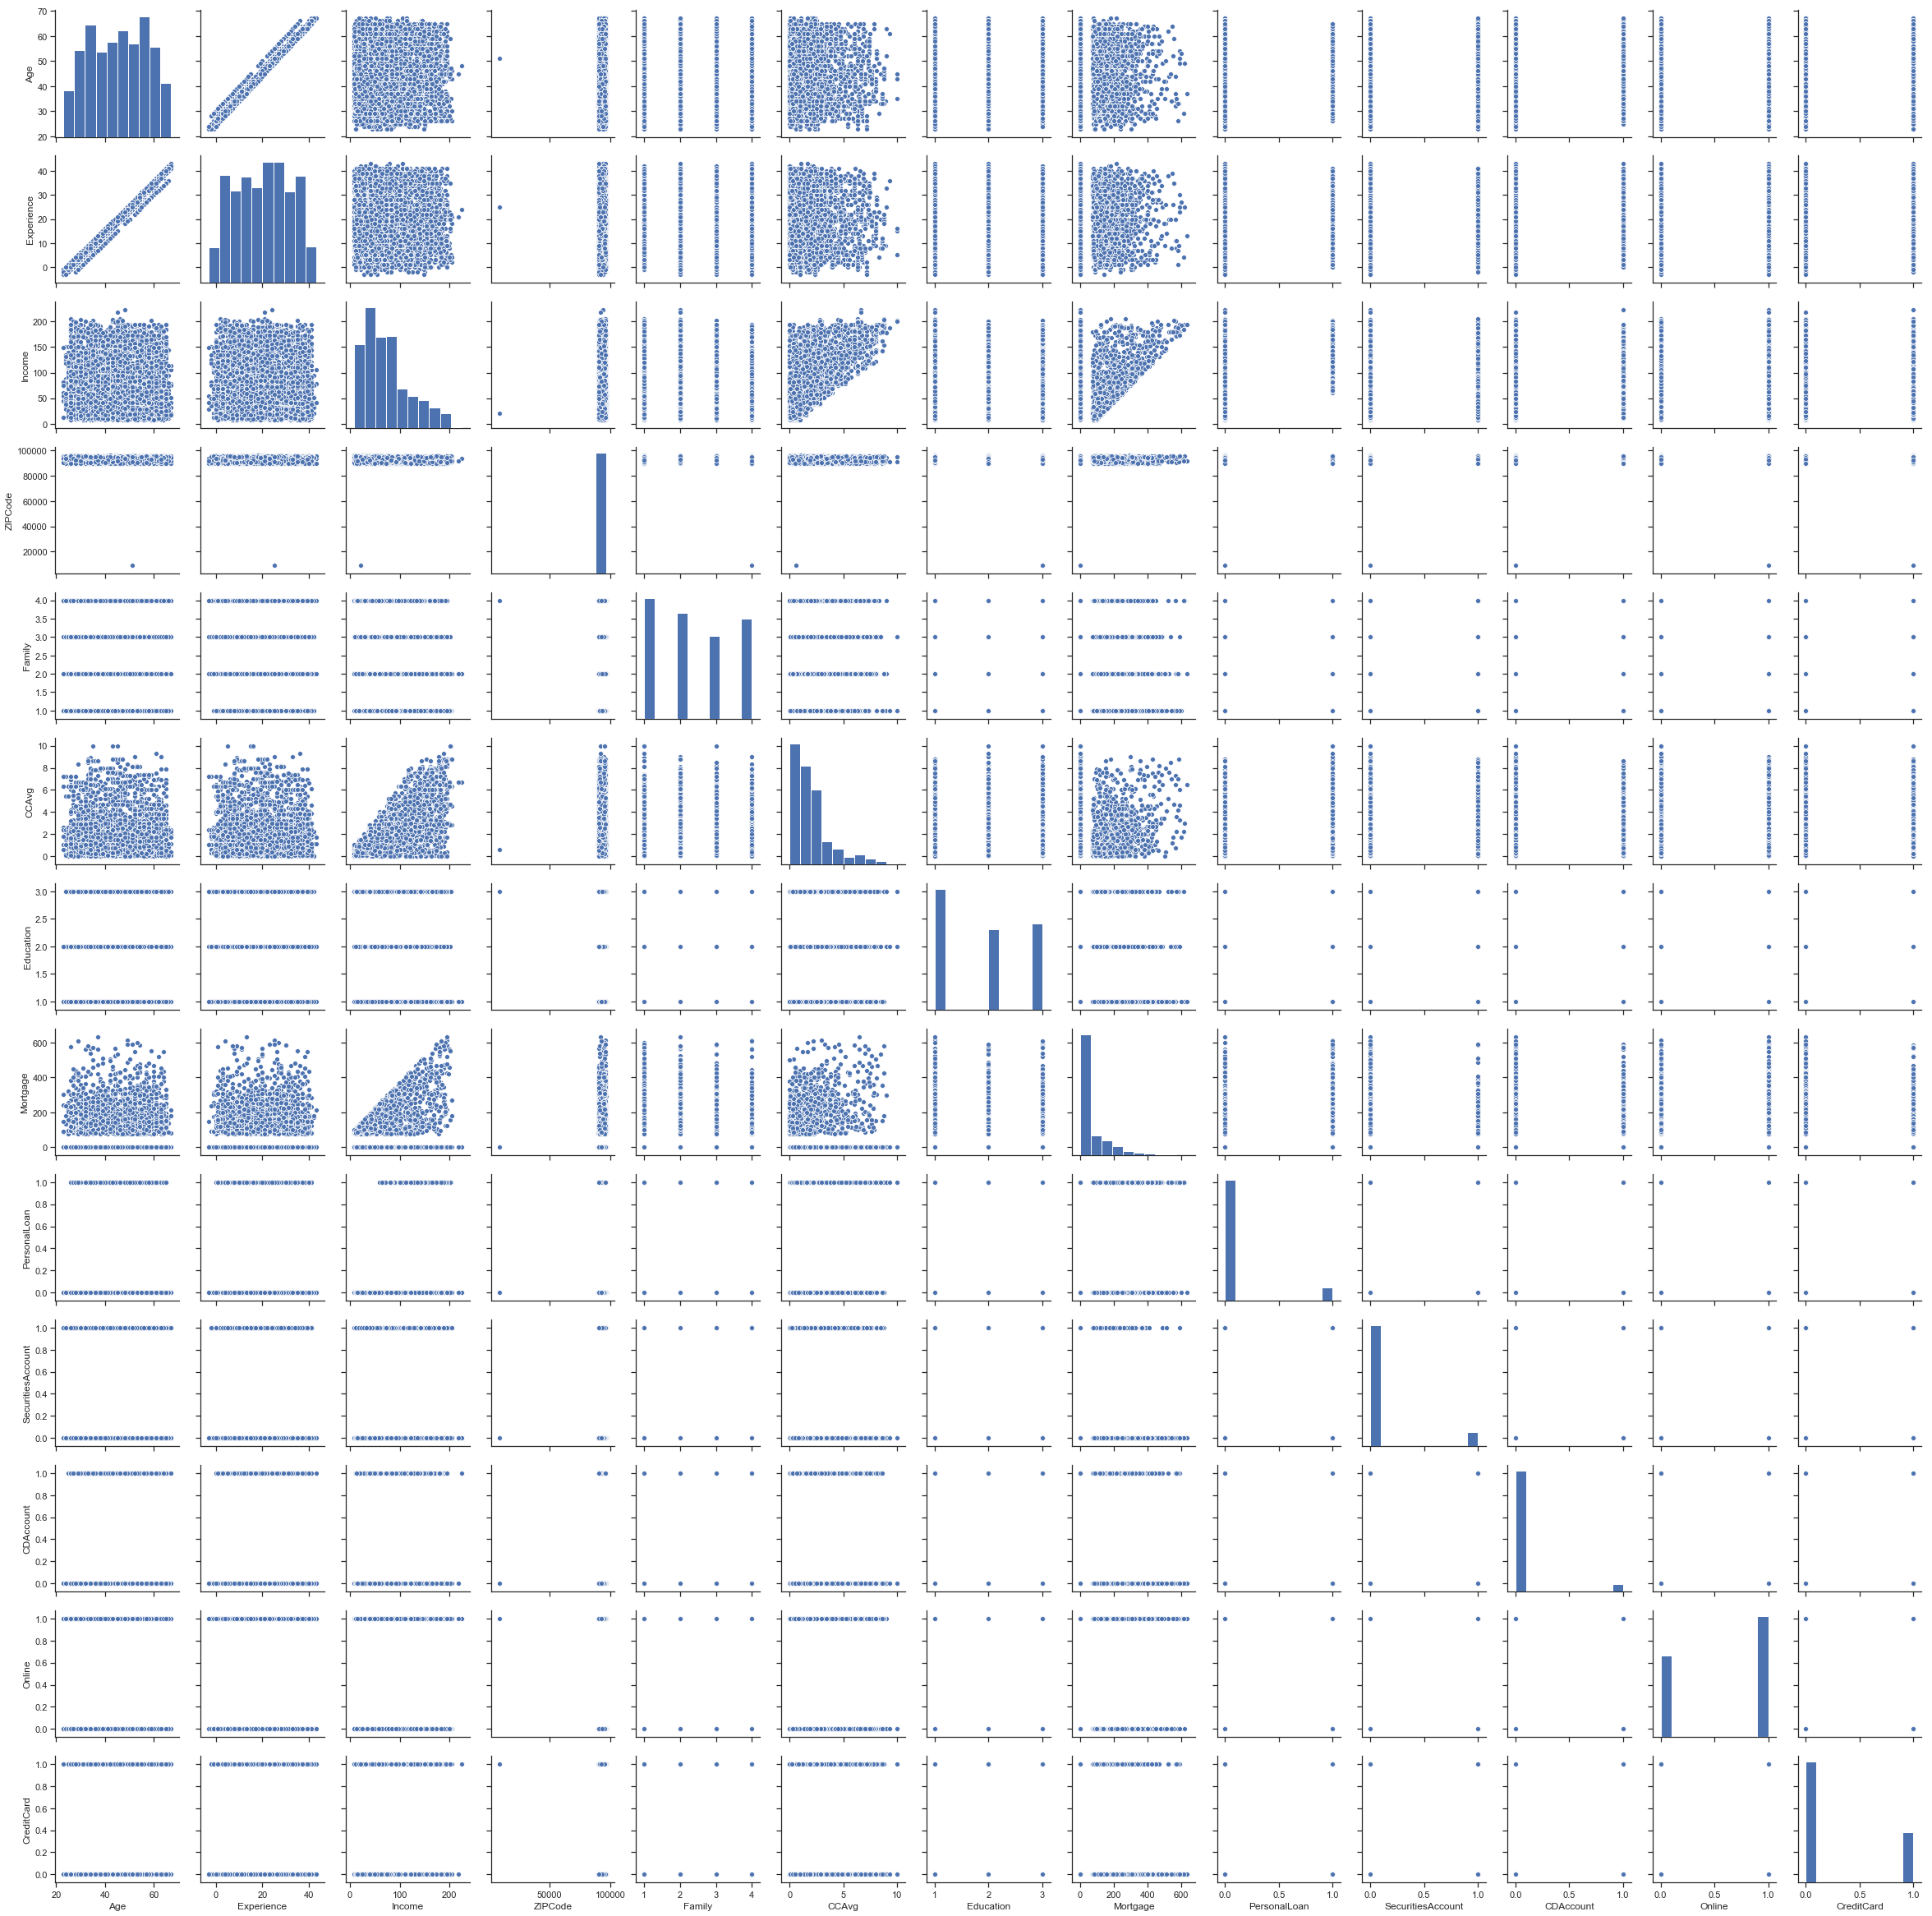

In [80]:
# Check the relation between each columns
sns.pairplot(data.iloc[:,1:])

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: Runtim

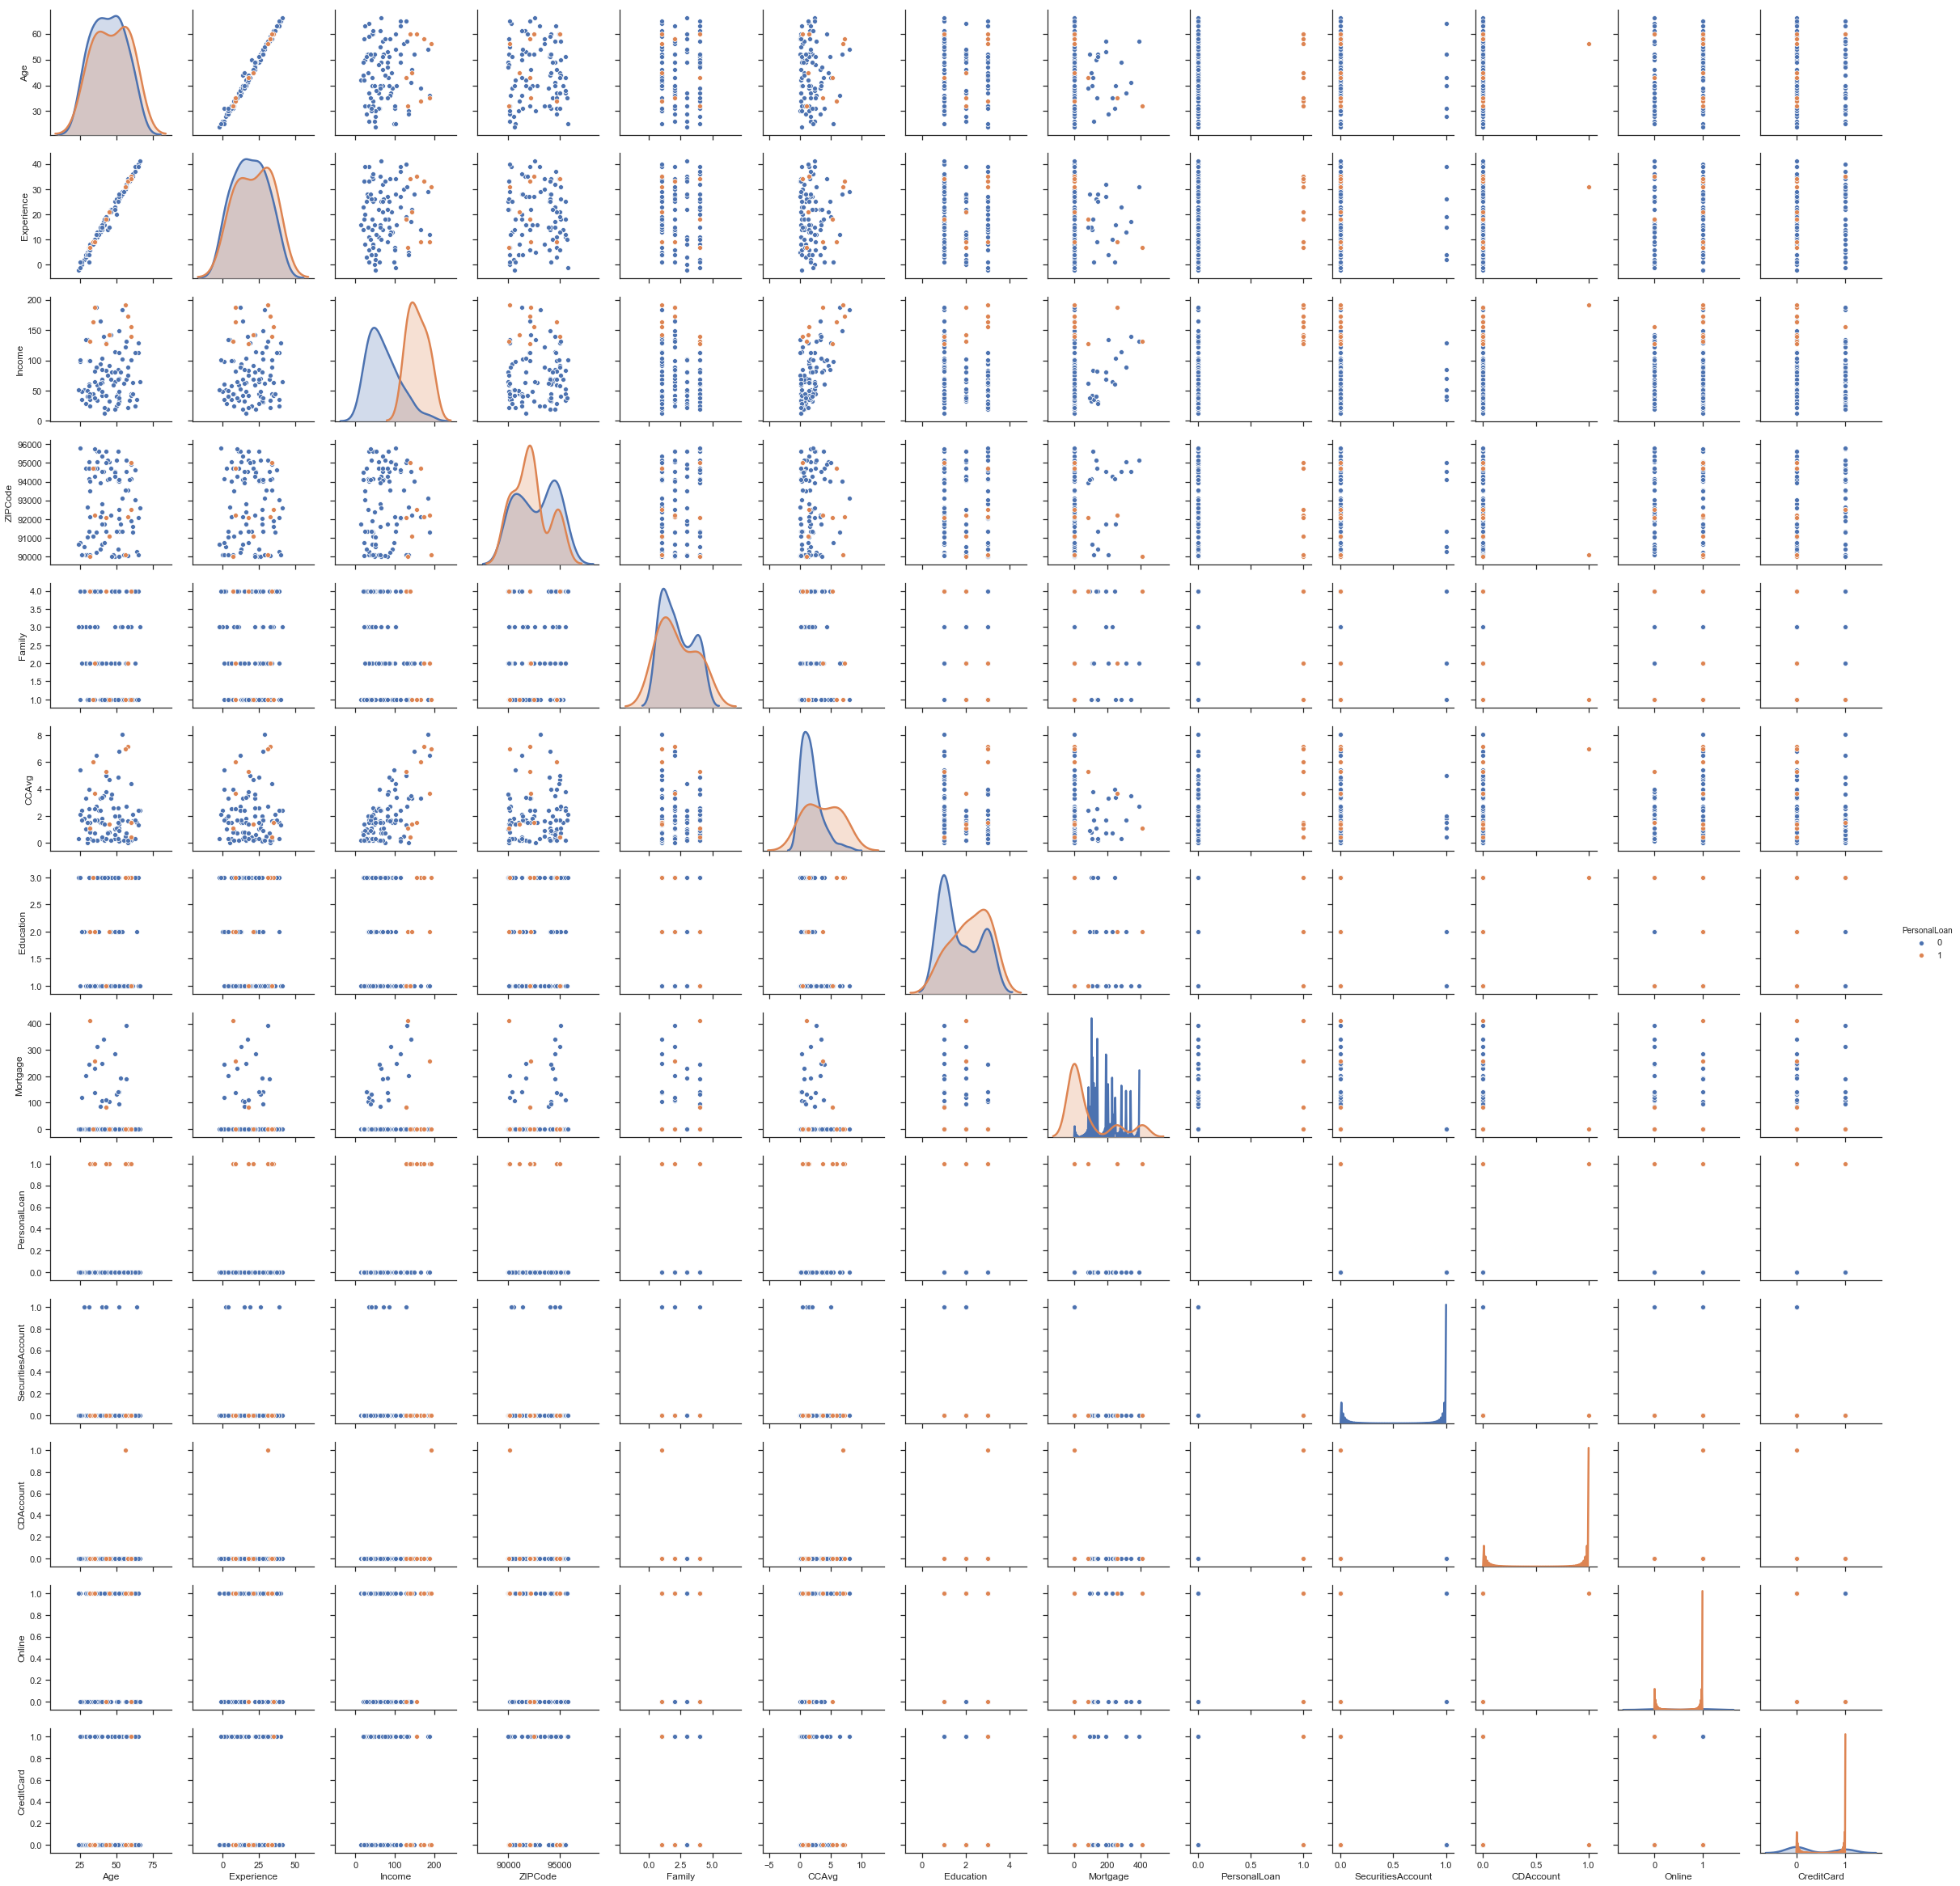

In [83]:
#sns.pairplot()
sns.pairplot(data.iloc[:,1:].sample(100),diag_kind='kde', hue="PersonalLoan")

# Observations:
    * Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
    * Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
    * Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
    * CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
    * Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
    * The variables family and education are ordinal variables. The distribution of families is evenly distributes


# Data Cleaning

In [84]:
# Found some negative values on Experience column
data[data['Experience'] < 0]['Experience'].count()

52

In [85]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [86]:
negExp.value_counts()


False    4948
True       52
Name: Experience, dtype: int64

In [87]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [88]:
data[data['Experience'] < 0]['Experience'].count()

0

In [89]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [90]:
## Here the target column is PersonalLoan

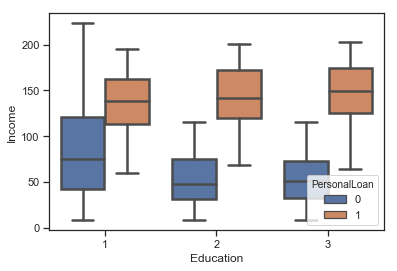

In [91]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

In [92]:
# Observation : It seems the customers whose education level is 1 is having more income. 
# However customers who has taken the personal loan have the same income levels

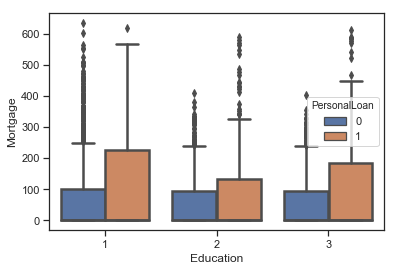

In [93]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data)

In [94]:
# Inference : The customers who have personal loan have high mortgage

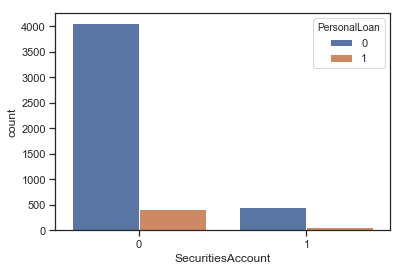

In [95]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

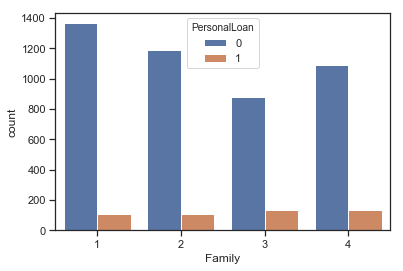

In [96]:
sns.countplot(x='Family',data=data,hue='PersonalLoan')


In [97]:
# Observations - Family size does not have any impact in personal loan

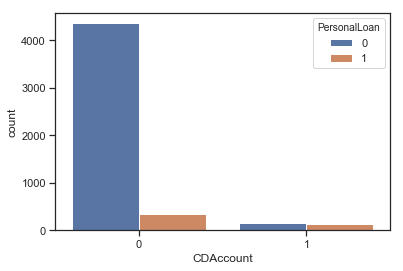

In [98]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')


In [99]:
# Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

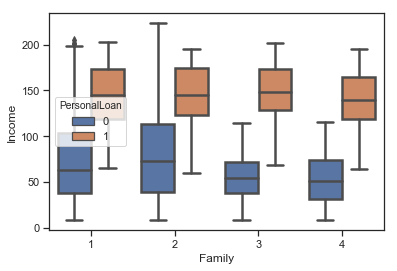

In [100]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

In [101]:
# Observation - Families with income less than 100K are less likely to take loan than families with high income

# Split data into train and test

In [102]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)


In [103]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [111]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
#train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=1)

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model_gnb = GaussianNB()
model_gnb.fit(train_set, train_labels)

model_gnb.score(train_set , train_labels)      # performance on test data

test_pred = model_gnb.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))

GaussianNB(priors=None)

0.8871428571428571

             precision    recall  f1-score   support

          0       0.95      0.92      0.94      1342
          1       0.47      0.61      0.53       158

avg / total       0.90      0.89      0.89      1500



In [105]:
# Naive Bayes
from sklearn.model_selection import cross_val_score, cross_val_predict

y_predict_gnb = model_gnb.predict(test_set)
gnb_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Naive Bayes Accuracy is: ", gnb_acc)
print(metrics.confusion_matrix(test_labels, test_pred))
scores = cross_val_score(model_gnb, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Naive Bayes Accuracy is:  0.8866666666666667
[[1234  108]
 [  62   96]]
Cross-validated scores: [0.9031339  0.87464387 0.89142857 0.89428571 0.86571429 0.87714286
 0.88285714 0.90857143 0.88538682 0.89398281] [0.9031339  0.87464387 0.89142857 0.89428571 0.86571429 0.87714286
 0.88285714 0.90857143 0.88538682 0.89398281]
Average score: 0.8877147405284941


In [109]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='lbfgs' , max_iter=5000 , multi_class='multinomial')
model_lr.fit(train_set, train_labels)

model_lr.score(train_set , train_labels)      # performance on test data
test_pred = model_lr.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))

lr_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Logistic Regression Accuracy is: ", lr_acc)

print(metrics.confusion_matrix(test_labels, test_pred))

scores = cross_val_score(model_lr, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.9431428571428572

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      1342
          1       0.80      0.56      0.66       158

avg / total       0.93      0.94      0.93      1500

Logistic Regression Accuracy is:  0.8866666666666667
[[1320   22]
 [  70   88]]
Cross-validated scores: [0.9002849  0.93447293 0.93428571 0.92285714 0.9        0.92285714
 0.93142857 0.92571429 0.95702006 0.90544413] [0.9002849  0.93447293 0.93428571 0.92285714 0.9        0.92285714
 0.93142857 0.92571429 0.95702006 0.90544413]
Average score: 0.9234364875281781


In [113]:
print("Logistic Regression score:" , model_lr.score(train_set , train_labels))
print("Nave Bayes score:" , model_gnb.score(train_set , train_labels))

Logistic Regression score: 0.9431428571428572
Nave Bayes score: 0.8871428571428571


In [ ]:
# Here Logistic Regression model seems like have the highest accuracy and we can choose that as our final model

In [114]:
# Compare Models
X=data.drop(['PersonalLoan','Experience','ID'],axis=1)
y=data.pop('PersonalLoan')

In [116]:
from sklearn import model_selection

LR: 0.908800 (0.007756)
NB: 0.885600 (0.010385)


Text(0.5,0.98,'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x2b671477c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2b671480550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6714776d8>,
 'medians': [<matplotlib.lines.Line2D at 0x2b671480e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b671480f28>,
 'means': []}

[Text(0,0,'LR'), Text(0,0,'NB')]

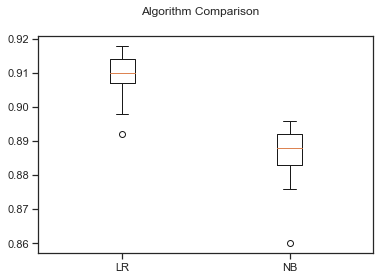

In [117]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [112]:
# Here Logistic Regression model seems like have the highest accuracy and we can choose that as our final model